# KNN K-Nearest Neighbours Modeli

* Daha önce elde edilen noktalara bakarak yeni bir nokta geldiği zaman onun hangi grupta olduğunu bulmak için kullanılır. 


* En yakındaki k tane komşu nokta bulunur. En çok hangi gruptan nokta varsa yeni gelen nokta o gruptan kabul edilir. 


* Burada önemli olan mesafe ölçmektir. Yapay zeka bu algoritmada yeni noktanın hangi grupta olduğunu bulurken Euclidean distance hesaplamasını kullanır.

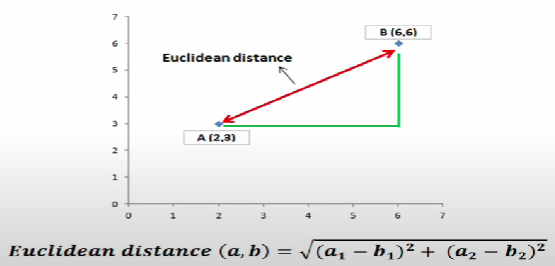

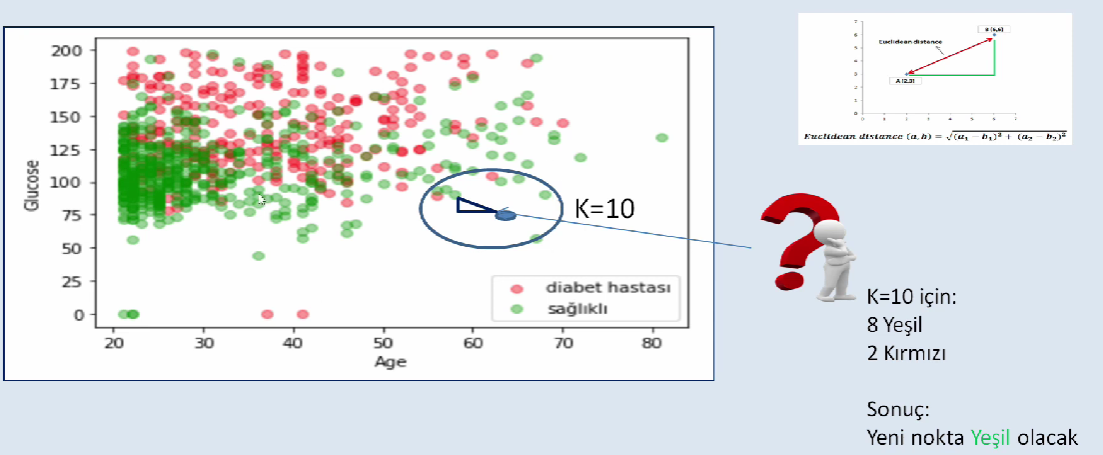

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [6]:
data=pd.read_csv("KNN_diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


* Şeker hastalarının ve sağlıklı hastaların dağılımını görmek için grafik çizilirse

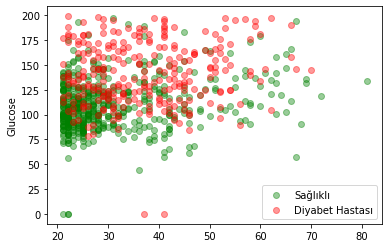

In [7]:
# DataFrame de verileri ayırırken filtering yapılır. 
# Outcame sütunu 1 olanlar şeker hastası 0 olanlar sağlıklı olarak filtrelenir.
diabets=data[data.Outcome==1]
nondiabets=data[data.Outcome==0]

# Şimdilik Gloucose değerine göre bir grafik çizimi yapılıyor. 
# alpha değeri renklerin ne kadar saydam veya koyuluk oranıdır. 
plt.scatter(nondiabets.Age, nondiabets.Glucose, color="green", label="Sağlıklı", alpha=0.4)
plt.scatter(diabets.Age, diabets.Glucose, color="red", label="Diyabet Hastası", alpha=0.4)
plt.xlabel=("Age")
plt.ylabel("Glucose")
plt.legend()
plt.show()

In [10]:
# x ve y eksenlerini belirleme
y=data.Outcome.values
x_ham_val= data.drop(["Outcome"], axis=1)

* Burada mesele Outcome değerini yani hasta olup olmadığının gösterildiği bağımlı sütunu çıkararak sadece bağımlı veriler bırakılıyor. Çünlü KNN algoritması x değerleri içerisinde gruplandırma yapacak.

In [11]:
# Normalizasyon yapılır. 
x= (x_ham_val - np.min(x_ham_val))/ (np.max(x_ham_val)-np.min(x_ham_val))

* Normalizasyon yapılmasının nedeni girilen değerlerin içeriklerinde bulunan değerlerin birbirinden farklı aralıklarda olması. KNN uygulanırken uzunluk ölçüsü alnıcağından bir sorun oluşturabilir.  ÖR: Pregnancies verisi 140-180 gibi değerlerde gezinirken, DiabetesPedigreeFunction verisi 0.6-2 gibi değerlerde gezinir. Bu durumda üçgen çizimi sorun oluyor.


* Bütün değerleri 0-1 arasına çekmek için normalizasyon işlemi yapılır. 

In [12]:
# Normalizasyon öncesi veriler

print(x_ham_val.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  
0                     0.627   50  
1                     0.351   31  
2                     0.672   32  
3                     0.167   21  
4                     2.288   33  


In [13]:
# Normalizasyon sonrası veriler

print(x.head())

# Hepsi 0-1 aralığına çekildi

   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.352941  0.743719       0.590164       0.353535  0.000000  0.500745   
1     0.058824  0.427136       0.540984       0.292929  0.000000  0.396423   
2     0.470588  0.919598       0.524590       0.000000  0.000000  0.347243   
3     0.058824  0.447236       0.540984       0.232323  0.111111  0.418778   
4     0.000000  0.688442       0.327869       0.353535  0.198582  0.642325   

   DiabetesPedigreeFunction       Age  
0                  0.234415  0.483333  
1                  0.116567  0.166667  
2                  0.253629  0.183333  
3                  0.038002  0.000000  
4                  0.943638  0.200000  


* Train yani eğitim datası ile test datasını ayırmamız gerekiyor. 



* Train datas sistemin sağlıklı insan ile hasta insanı ayırt etmesini öğrenmek için kullanılacak. 


* Test datas makine öğrenme modelinin ne kadar doğru bir şekilde hasta ve sağlıklı insanları ayırt edebildiğini test etmek için kullanılacak. 

In [31]:
#verileri ayırmak;

x_train, x_test, y_train, y_test= train_test_split(x,y, test_size= 0.2, random_state=1)
# x - normalize edilmiş veriler 
# y - Outcome yani 1-0 lar 
# test_size - %20 olarak alınmış. yani toplam verinin %20 si test olarak alınıyor.
# bölece %80 eğitim verisi için kullanılır.


In [32]:
# KNN modeli

knn=KNeighborsClassifier(n_neighbors=3) # n_neighbors aslında k değeridir.
knn.fit(x_train, y_train)
prediction=knn.predict(x_test)

# K=3 için test verilerin doğrulama sonucu: 
print(" k=3 için test doğrulama sonucu: ", knn.score(x_test, y_test))

 k=3 için test doğrulama sonucu:  0.7857142857142857


In [33]:
# K kaç olmalı 
# K denemesi

sayac=1
for k in range(1,11):
    knn_new=KNeighborsClassifier(n_neighbors=k )
    knn_new.fit(x_train,y_train)
    print(sayac," Doğruluk oranı: % ", knn_new.score(x_test,y_test)*100)
    sayac +=1

1  Doğruluk oranı: %  69.48051948051948
2  Doğruluk oranı: %  74.02597402597402
3  Doğruluk oranı: %  78.57142857142857
4  Doğruluk oranı: %  75.97402597402598
5  Doğruluk oranı: %  79.87012987012987
6  Doğruluk oranı: %  79.22077922077922
7  Doğruluk oranı: %  81.16883116883116
8  Doğruluk oranı: %  79.22077922077922
9  Doğruluk oranı: %  78.57142857142857
10  Doğruluk oranı: %  79.22077922077922


* En iyi Doğruluk oranını k=7 iken veriyor. 


* test_size değiştirildikçe bu değerlerin doğruluk oranları değişir.